<center>
    <div style="font-family: Garamond; font-size: 25px; font-weight: bold; color: black;">
        GLOBAL SUPERSTORE ANALYSIS
    </div>
</center>

<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
    INTRODUCTION:
</div>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    The dataset at hand is a transactional record from Global Superstore. It includes details about customer orders, shipping information, product categories, sales metrics, and regional markets. This dataset is valuable for analyzing business performance, customer trends, and logistical efficiency. This project aims to clean, process, and explore the dataset to uncover actionable insights that can help improve business decision-making.
</div>

<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
   IMPORTING LIBRARIES AND DATA FRAME:
</div>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    we begin by importing the necessary Python libraries and loading the dataset into a pandas DataFrame for analysis.
</div>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("C:/Users/HP/OneDrive/Documents/PYTHON/PORTFOLIO/EXCEL/global_superstore_2016.xlsx")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
   DATA INFORMATION AND CLEANING:
</div>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    We will explore the dataset to understand its structure, data types, and anomalies.
</div>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [9]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

<br>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    From the above, only the Postal Code column has missing values (41296; which is about 80% of the total, 51290). We will therefore drop this column. We will equally drop the Row ID as it is irrelevant since we have the Order ID as the identifier.
</div>

In [11]:
df = df.drop(columns=['Postal Code', 'Row ID'], errors='ignore')
print(df.columns)

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority'],
      dtype='object')


<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    From the above, you can see we no longer have Postal code and Row ID columns.
    <br>
    <br>
    We will then go on to check and remove duplicates.
</div>

In [13]:
print(f'Duplicate rows: {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)

Duplicate rows: 0


<br>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    We will add new columns which can provide deeper insights. They include
    <br>
    We will add delivery time, <br>
    profit margin, <br>
    and total cost 
</div>

In [15]:
df['Delivery Time'] = (pd.to_datetime(df['Ship Date']) - pd.to_datetime(df['Order Date'])).dt.days

df['Profit Margin'] = (df['Profit']/df['Sales'])*100

df['Total Cost'] = df['Sales'] + df['Shipping Cost']

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Delivery Time,Profit Margin,Total Cost
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,...,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High,2,28.000000,262.750
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2,-7.784693,4633.025
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,1,17.776630,6090.661
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,Germany,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2,-3.337586,3802.670
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,Senegal,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,1,10.996272,3736.000


<br>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    We will then check for outliers as they can skew our analysis.
</div>

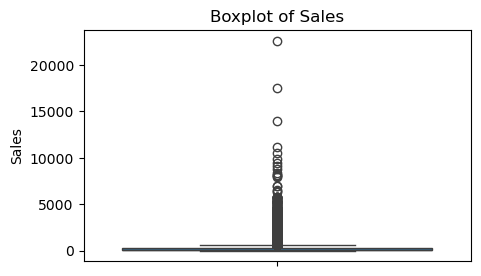

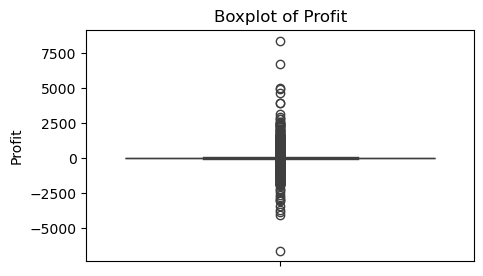

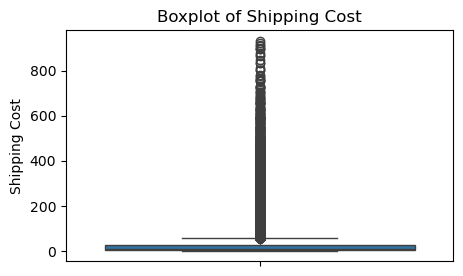

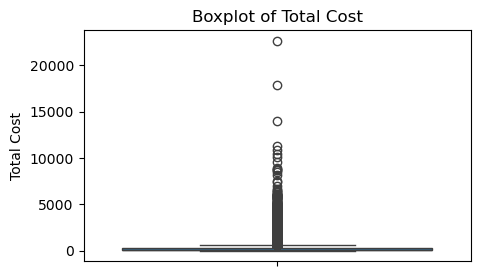

In [17]:
for col in ['Sales', 'Profit', 'Shipping Cost', 'Total Cost']:
    plt.figure(figsize=(5,3))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

<br>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    We will then remove the outliers
</div>

In [19]:
for col in ['Sales', 'Profit', 'Shipping Cost', 'Total Cost']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
   EDA
</div>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    Below, we'll explore statistical summaries, data distributions, and visualizations to gain insights into Sales, Profit, Regions, Products, and more.
</div>

In [21]:
df.describe()

,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost,Delivery Time,Profit Margin,Total Cost
count,32501,32501,32501.000000,32501.000000,32501.000000,32501.000000,32501.000000,32501.000000,32501.000000,32501.000000
mean,2014-05-12 00:35:42.654072064,2014-05-16 01:17:05.580751360,56.736981,2.973478,0.135922,8.617549,5.699733,4.028738,7.926544,62.436714
min,2012-01-01 00:00:00,2012-01-03 00:00:00,0.444000,1.000000,0.000000,-40.020000,1.002000,0.000000,-275.000000,1.454000
25%,2013-06-19 00:00:00,2013-06-23 00:00:00,19.680000,2.000000,0.000000,0.510000,1.860000,3.000000,1.898734,21.913000
50%,2014-07-09 00:00:00,2014-07-12 00:00:00,42.528000,2.000000,0.000000,6.120000,3.723000,4.000000,18.966604,47.040000
75%,2015-05-21 00:00:00,2015-05-26 00:00:00,82.950000,4.000000,0.200000,16.420000,7.842000,5.000000,34.401709,91.360000
max,2015-12-31 00:00:00,2016-01-07 00:00:00,217.980000,14.000000,0.800000,66.660000,25.280000,7.000000,50.000000,222.698000
std,NaN,NaN,47.082070,1.948878,0.210697,17.399509,5.113267,1.706865,43.104114,50.890201


<br>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    With basic statistics above, we can easily spot inconsistencies, ranges and anomalies.
</div>

<br>
<br>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    We can also use data distributions to detect inconsistencies in our dataset. We will visualize the distribution of Sales, Profit and Shopping Cost using Histograms
</div>

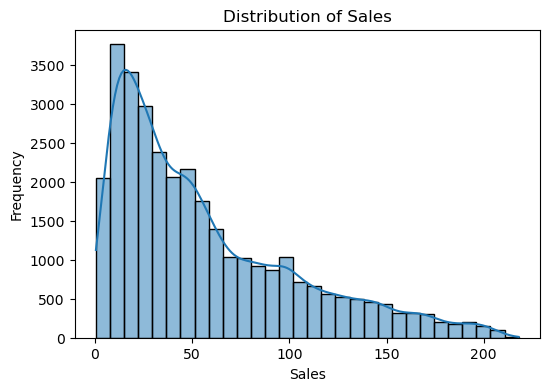

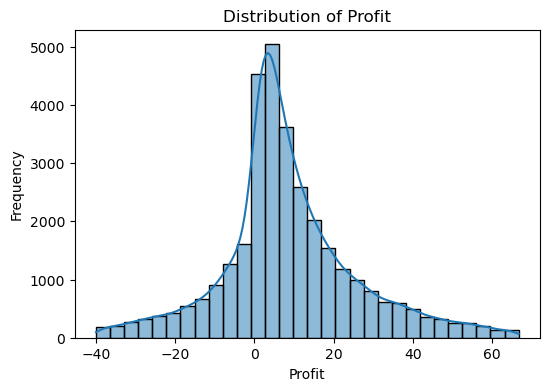

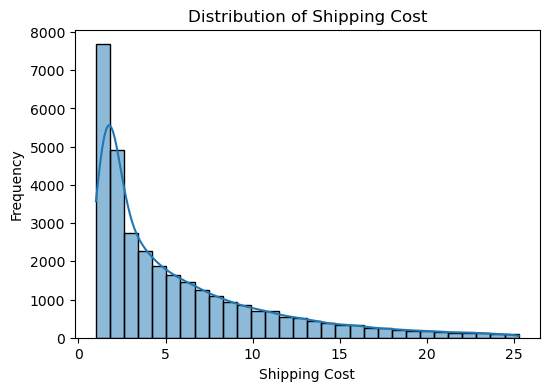

In [24]:
for col in ['Sales', 'Profit', 'Shipping Cost']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<br>
<br>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    We will also carryout correlation analysis to study the relationship between several variables
</div>

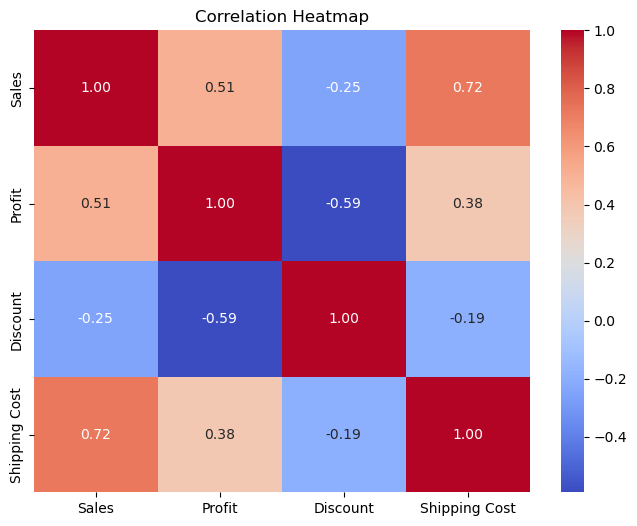

In [26]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Sales', 'Profit', 'Discount', 'Shipping Cost']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    From the heatmap, we can deduct that when sales increases, profit and shipping cost responds positively
</div>

<br>
<br>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    We will look at regional insights. What regions are doing best
</div>

Regional Sales and Profit:
                           Sales       Profit
Region                                      
Western Europe     234228.95100  42892.52100
Central America    228188.96164  33395.58164
Oceania            136170.50100  16176.89100
Southeastern Asia  112016.24580  -1170.47420
Southern Asia      108374.73900  21390.72900
Western US         106050.85800  25478.46140
South America       99753.19380  10511.09380
Eastern US          88093.52100  18855.50240
Eastern Asia        88011.78900  18071.94900
Southern Europe     87719.34000  15559.92000
Northern Europe     78575.01000   9786.69000
Central US          65775.87860   9446.45710
Caribbean           65386.75544   8651.13544
Eastern Europe      60879.84000  14580.48000
Western Asia        57974.64900  -2624.48100
North Africa        53058.42000  12383.49000
Southern US         52145.18700  10919.39340
Western Africa      28841.22300  -3266.30700
Central Africa      27504.69000   6439.44000
Eastern Africa      26267.6

<Figure size 800x500 with 0 Axes>

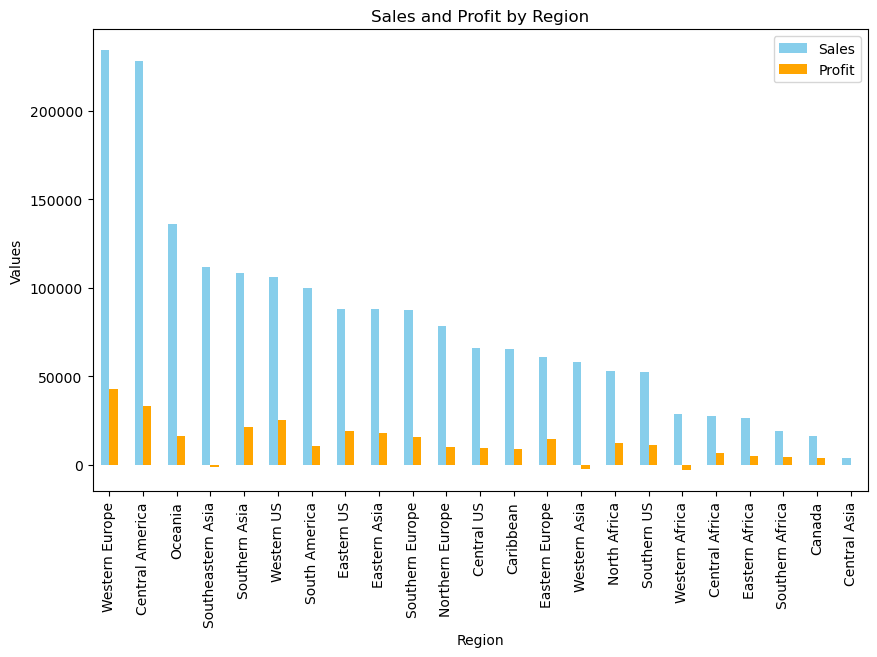

In [28]:
# Grouping by 
regional_data = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
print("Regional Sales and Profit:\n", regional_data)

# Bar plot 
plt.figure(figsize=(8, 5))
regional_data.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Sales and Profit by Region')
plt.ylabel('Values')
plt.show()

<br>
<br>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    In the same way we did for regions, we will look at top products
</div>

Top 10 Products by Sales:
                                            Sales  Quantity
Product Name                                              
Staples                                6415.2200       860
Sanford Pencil Sharpener, Water Color  4538.9401       204
Stanley Pencil Sharpener, Water Color  4272.3780       177
Binney & Smith Sketch Pad, Blue        3909.7168       103
Wilson Jones 3-Hole Punch, Durable     3770.7880       148
Cardinal Binding Machine, Economy      3416.0469        86
Boston Pencil Sharpener, Water Color   3326.9910       147
Avery Binding Machine, Clear           3209.3740        82
Stanley Markers, Water Color           3046.2768       142
Fellowes Trays, Wire Frame             3023.4330        66


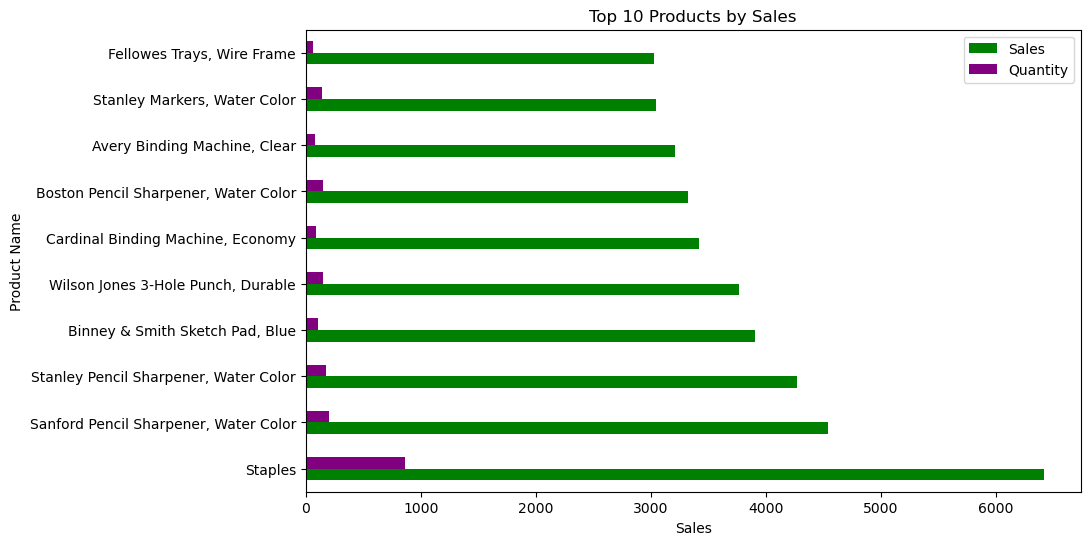

Category Sales and Profit:
                         Sales        Profit
Category                                   
Furniture        3.086050e+05   36432.53170
Office Supplies  1.237444e+06  202814.72850
Technology       2.979593e+05   40831.70178


In [30]:
# Top-performing products
top_products = df.groupby('Product Name')[['Sales', 'Quantity']].sum().sort_values('Sales', ascending=False).head(10)
print("Top 10 Products by Sales:\n", top_products)

# Bar plot for top products
top_products.plot(kind='barh', figsize=(10, 6), color=['green', 'purple'])
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

# Category performance
category_data = df.groupby('Category')[['Sales', 'Profit']].sum()
print("Category Sales and Profit:\n", category_data)

<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
   DATA VISUALIZATION
</div>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    We will visualize metrics from our dataset to showcase trends, relationships, and patterns which will aid the businesses decision making
</div>

<br>
<br>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    Let will start with Trends in profit and Sales over time
</div>

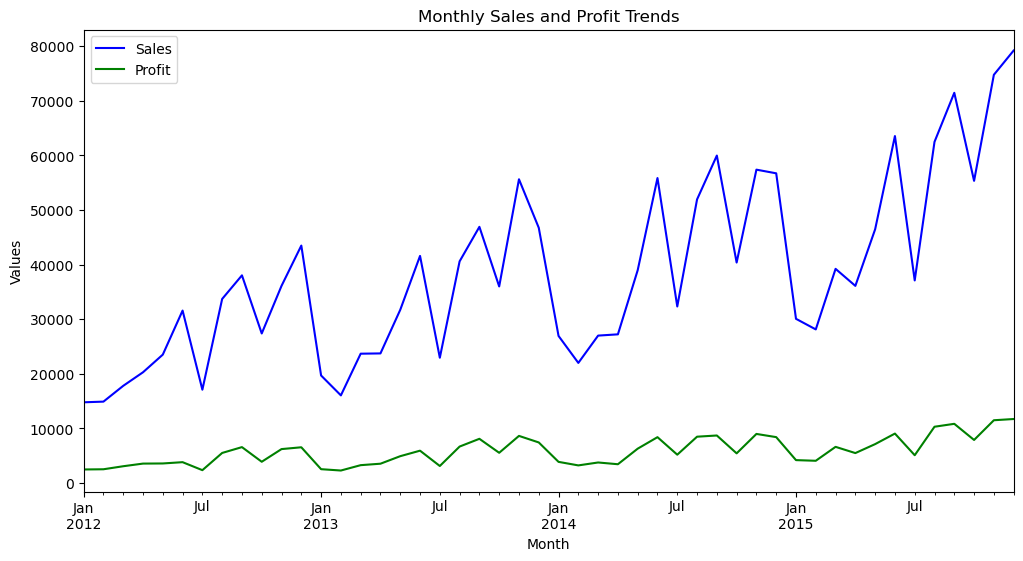

In [71]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Grouping by year and month for Sales
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.to_period('M')

sales_trends = df.groupby('Month')['Sales'].sum()
profit_trends = df.groupby('Month')['Profit'].sum()

# Plotting sales trends
plt.figure(figsize=(12, 6))
sales_trends.plot(label='Sales', color='blue')
profit_trends.plot(label='Profit', color='green')
plt.title('Monthly Sales and Profit Trends')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.show()

<br>
<br>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    We can also visualize the Sales by Category and Sub-Category using bar chart
</div>

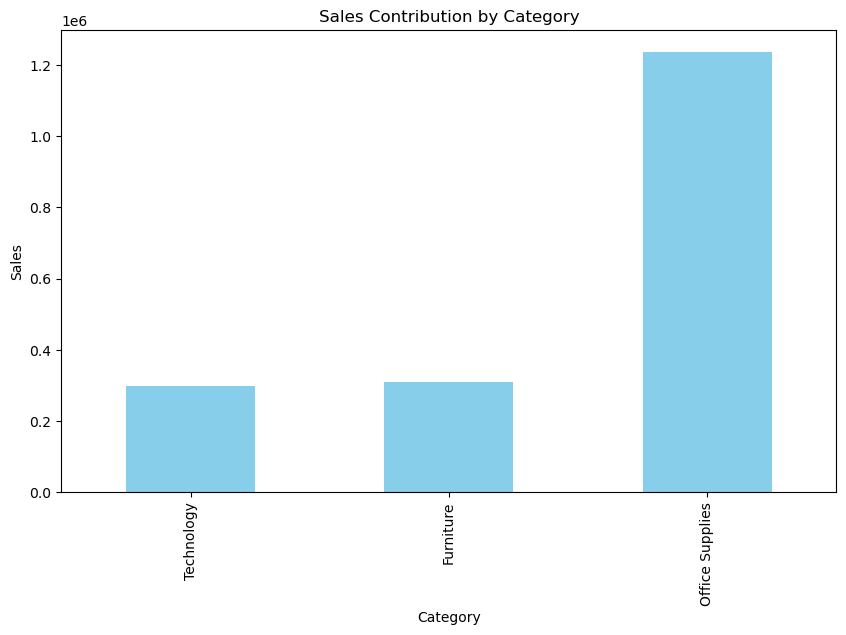

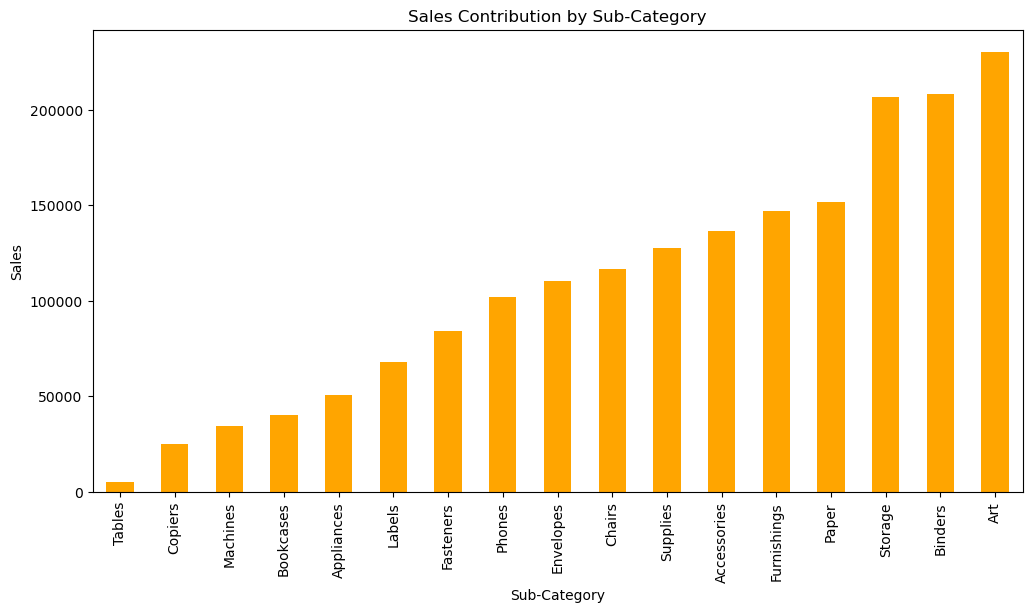

In [103]:
# Bar plot for Category and Sub-Category
category_data = df.groupby('Category')['Sales'].sum().sort_values()
subcategory_data = df.groupby('Sub-Category')['Sales'].sum().sort_values()

#Category
plt.figure(figsize=(10, 6))
category_data.plot(kind='bar', color='skyblue')
plt.title('Sales Contribution by Category')
plt.ylabel('Sales')
plt.show()

#Sub category
plt.figure(figsize=(12, 6))
subcategory_data.plot(kind='bar', color='orange')
plt.title('Sales Contribution by Sub-Category')
plt.ylabel('Sales')
plt.show()

<br>
<br>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    We can also look at the customers segments to know who to potentially focus on
</div>

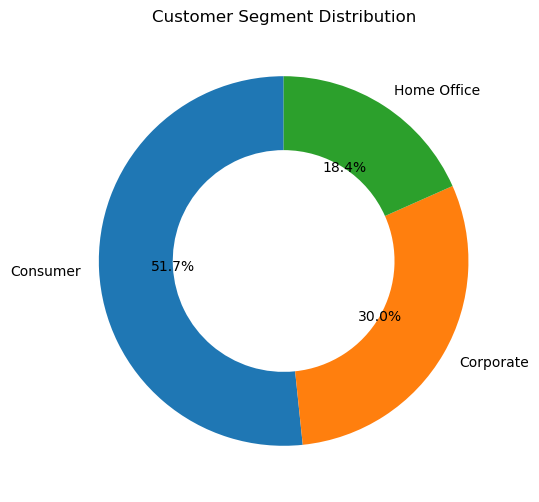

In [84]:
segment_counts = df['Segment'].value_counts()

# Plot doughnut chart
plt.figure(figsize=(8, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
plt.title('Customer Segment Distribution')
plt.show()

<br>
<br>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    And lastly, we would look at Sales based on Order Priority and Ship Mode. 
</div>

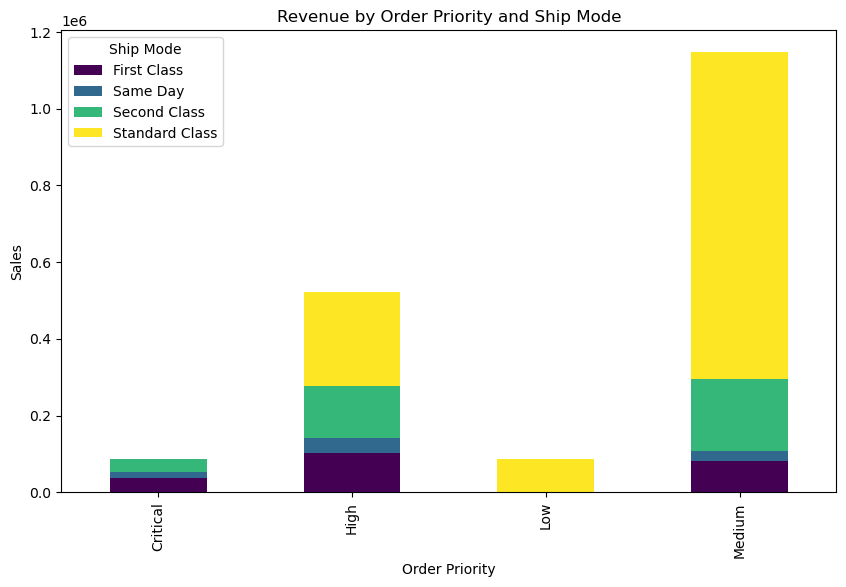

In [78]:
# Stacked bar chart for Order Priority and Ship Mode
priority_ship_data = df.groupby(['Order Priority', 'Ship Mode'])['Sales'].sum().unstack()

priority_ship_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Revenue by Order Priority and Ship Mode')
plt.ylabel('Sales')
plt.xlabel('Order Priority')
plt.legend(title='Ship Mode')
plt.show()


<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    From the above, we can see that the majority of the orders are Standard and only a few are done same day
</div>

<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
   INSIGHTS AND RECOMMENDATIONS
</div>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    Based on the analysis, the following insights were derived. <br>
    * PROFITABILITY BY PRODUCT CATEGORY: Office Supplies contributes the highest sales, driven by consistent demand and good price points. The furniture and Technology category shows almost equal sales as seen in the Sales Contribution by Category bar chart. <br>
    * REGIONAL SALES TRENDS: West Europe and Central America generate the highest sales and profits, while Central Asia lags the most in sales, suggesting untapped potential in certain countries. Some regions, however, despite sales are experiencing a negative outcome; that is loss instead of profits. They include; Southeastern Asia, Western Asia, and Western Africa. <br>
    * SHIPPING AND ORDER PRIORITY: Though medium priority generates the most revenue,high-priority orders contribute significantly to revenue, indicating that optimizing delivery times for such orders could enhance customer retention. <br>
    * CUSTOMER SEGMENT ANALYSIS: The consumer segment contributes over half of the revenue making them the ideal target for regions looking to grow like Western Africa.<br>
    Here are the  proposed recommendations; <br>
    + Since office supplies result in the most revenue, allocate more resources toward marketing and stocking these products. Consider ways of capitalizing on this trend by introducing more quality and aesthetic office supplies. <br>
    + Launch marketing campaigns targeting underperforming regions to boost sales and awareness. Carry out research to understand the specifics of each region and offer region-specific promotions or partnerships to attract new customers in these areas.
</div>